#2024 MLB Player Performance Analysis

###Import Libraries

In [ ]:
!pip install pybaseball

In [ ]:
from pybaseball import batting_stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

###Import 2024 Batter Stats

In [ ]:
# Batters stats for 2024 Season
batting_2024 = batting_stats(2024)

# Filtering with > 100 at-bats
batting_2024 = batting_2024[batting_2024['AB'] > 100]

print(batting_2024.head())
print(batting_2024.columns)
print(batting_2024.info())
print(batting_2024.describe())

    IDfg  Season              Name Team  Age    G   AB   PA    H   1B  ...  \
0  15640    2024       Aaron Judge  NYY   32  158  559  704  180   85  ...   
3  25764    2024    Bobby Witt Jr.  KCR   24  161  636  709  211  123  ...   
1  19755    2024     Shohei Ohtani  LAD   29  159  636  731  197   98  ...   
2  20123    2024         Juan Soto  NYY   25  157  576  713  166   90  ...   
9  26289    2024  Gunnar Henderson  BAL   23  159  630  719  177  102  ...   

   maxEV  HardHit  HardHit%  Events  CStr%   CSW%    xBA   xSLG  xwOBA  L-WAR  
0  117.5      238     0.609     391  0.146  0.267  0.310  0.723  0.479   11.4  
3  116.9      259     0.481     538  0.138  0.236  0.315  0.577  0.407   10.4  
1  119.2      287     0.595     482  0.144  0.269  0.314  0.660  0.442    9.2  
2  115.7      262     0.568     461  0.189  0.263  0.316  0.646  0.462    7.9  
9  113.1      256     0.539     475  0.167  0.265  0.283  0.492  0.374    8.2  

[5 rows x 320 columns]
Index(['IDfg', 'Season', 'N

##Data Cleaing

In [ ]:
# Drop irrelevant columns
batting_2024 = batting_2024.drop(columns=['Season', 'IDfg'], errors='ignore')

# Drop rows with any null values in critical stat columns
important_cols = ['OPS', 'SLG', 'HR', 'AVG']  # add more if needed
batting_2024 = batting_2024.dropna(subset=important_cols)

# Optional: remove rows where any column has '---' string
batting_2024 = batting_2024[~batting_2024.isin(['- - -', '---']).any(axis=1)]

###Feature Extraction

In [ ]:
# SO rate
batting_2024['SO_rate'] = batting_2024['SO'] / batting_2024['AB']

# BB rate
batting_2024['BB_rate'] = batting_2024['BB'] / batting_2024['AB']

# Power Score
batting_2024['Power Score'] = 0.5 * batting_2024['HR'] + 0.5 * batting_2024['SLG']

print(batting_2024.head())

               Name Team  Age    G   AB   PA    H   1B  2B  3B  ...  Events  \
0       Aaron Judge  NYY   32  158  559  704  180   85  36   1  ...     391   
3    Bobby Witt Jr.  KCR   24  161  636  709  211  123  45  11  ...     538   
1     Shohei Ohtani  LAD   29  159  636  731  197   98  38   7  ...     482   
2         Juan Soto  NYY   25  157  576  713  166   90  31   4  ...     461   
9  Gunnar Henderson  BAL   23  159  630  719  177  102  31   7  ...     475   

   CStr%   CSW%    xBA   xSLG  xwOBA  L-WAR   SO_rate   BB_rate  Power Score  
0  0.146  0.267  0.310  0.723  0.479   11.4  0.305903  0.237925      29.3505  
3  0.138  0.236  0.315  0.577  0.407   10.4  0.166667  0.089623      16.2940  
1  0.144  0.269  0.314  0.660  0.442    9.2  0.254717  0.127358      27.3230  
2  0.189  0.263  0.316  0.646  0.462    7.9  0.206597  0.223958      20.7845  
9  0.167  0.265  0.283  0.492  0.374    8.2  0.252381  0.123810      18.7645  

[5 rows x 321 columns]


##Visualizations

###HR Distribution

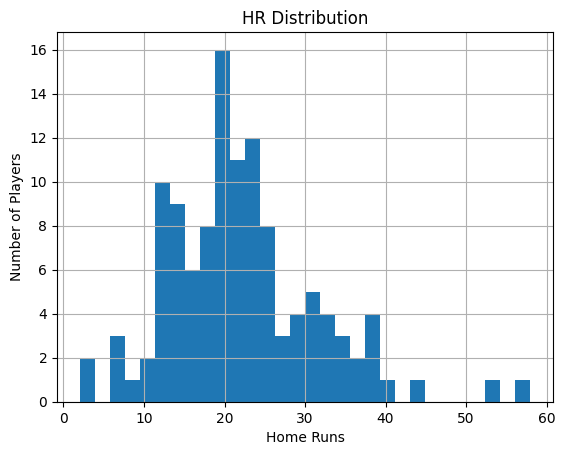

In [ ]:
# Home Run Distribution Histogram
batting_2024['HR'].hist(bins = 30)
plt.title('HR Distribution')
plt.xlabel('Home Runs')
plt.ylabel('Number of Players')
plt.show()

###OPS Distribution

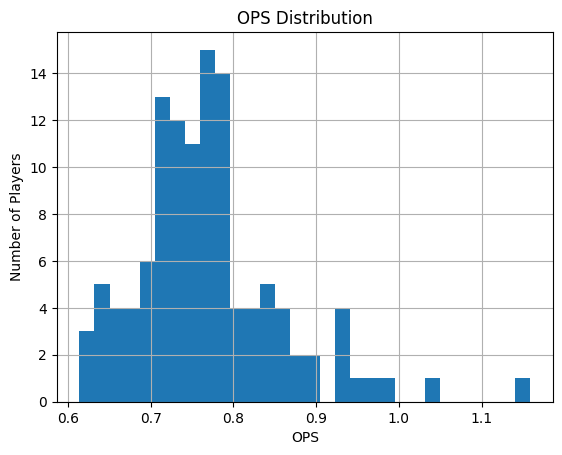

In [ ]:
# OPS Distrubution Histogram
batting_2024['OPS'].hist(bins = 30)
plt.title('OPS Distribution')
plt.xlabel('OPS')
plt.ylabel('Number of Players')
plt.show()

###Correlation Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

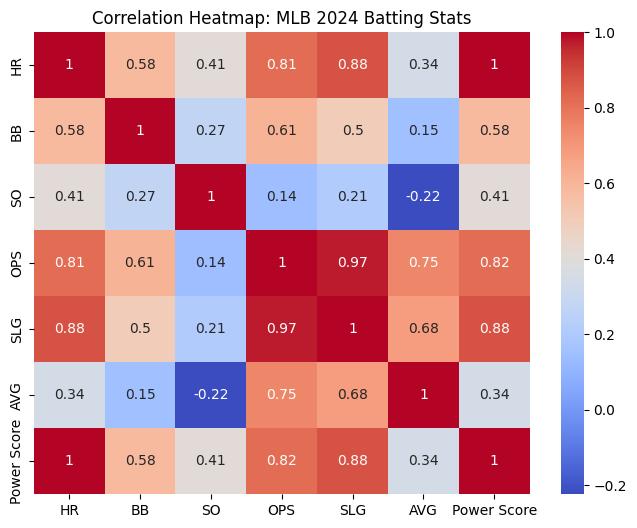

In [ ]:
corr = batting_2024[['HR', 'BB', 'SO', 'OPS', 'SLG', 'AVG', 'Power Score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap: MLB 2024 Batting Stats')
plt.show

###Scatter Plot for Correlated Features

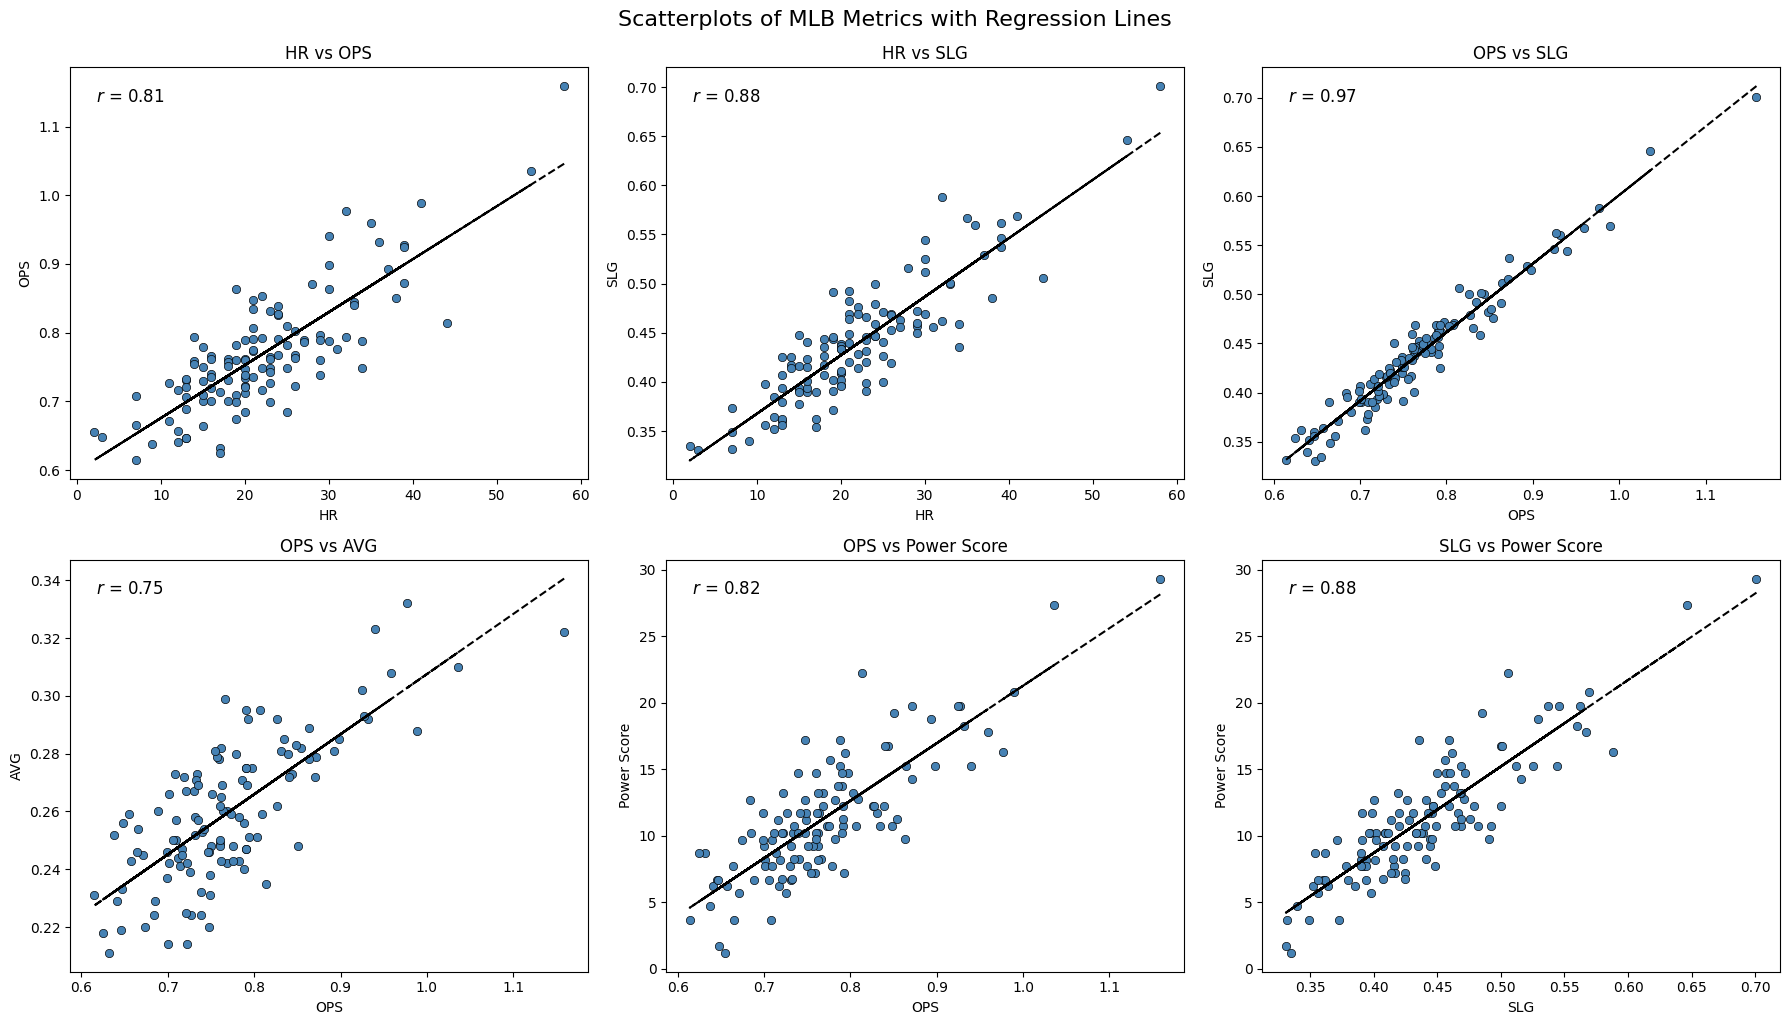

In [ ]:
# Correlated features with (r > 0.70)
plots = [
    ('HR', 'OPS'),
    ('HR', 'SLG'),
    ('OPS', 'SLG'),
    ('OPS', 'AVG'),
    ('OPS', 'Power Score'),
    ('SLG', 'Power Score')
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ax, (x, y) in zip(axes.ravel(), plots):
    sns.scatterplot(data=batting_2024, x=x, y=y, ax=ax, color='steelblue', edgecolor='black')

    slope, intercept, r_value, p_value, _ = linregress(batting_2024[x], batting_2024[y])
    ax.plot(batting_2024[x], intercept + slope * batting_2024[x], color='black', linestyle='--')

    ax.text(0.05, 0.95, f'$r$ = {r_value:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    ax.set_title(f'{x} vs {y}')

plt.tight_layout()
plt.suptitle("Scatterplots of MLB Metrics with Regression Lines", fontsize=16, y=1.02)
plt.show()

###Average Team OPS

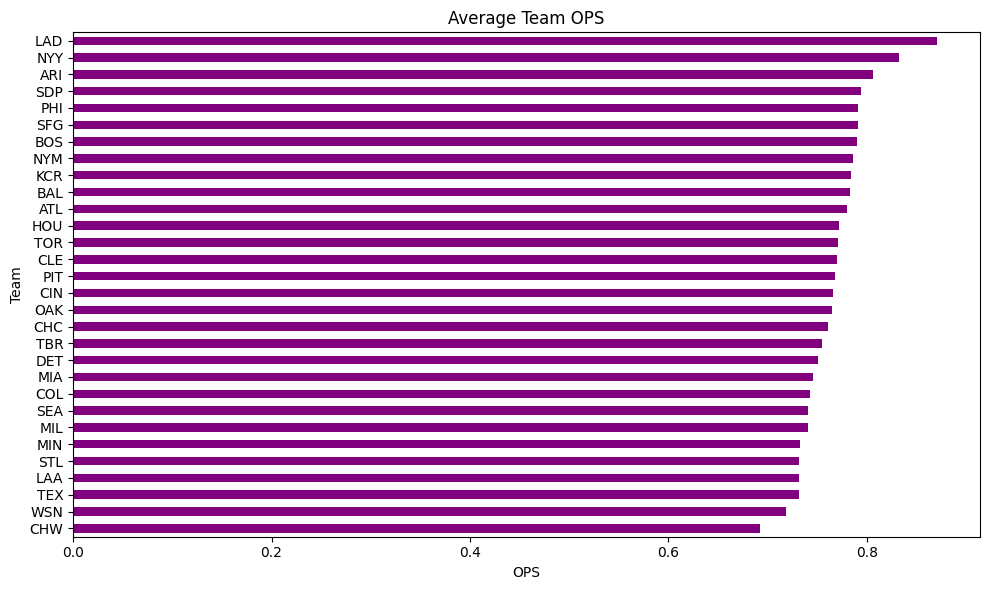

In [ ]:
team_ops = batting_2024.groupby('Team')['OPS'].mean().sort_values()

plt.figure(figsize=(10,6))
team_ops.plot(kind='barh', color='purple')
plt.title('Average Team OPS')
plt.xlabel('OPS')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

###OPS vs. Strikeout Rate by Team

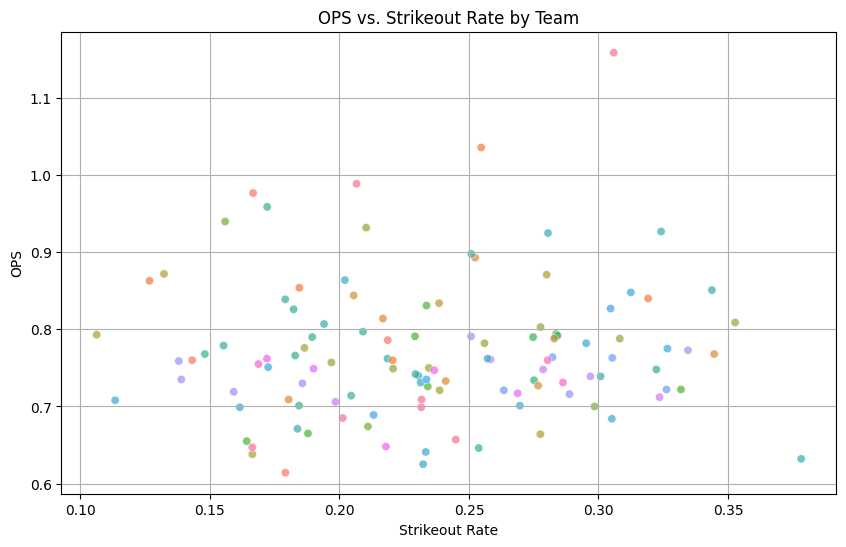

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=batting_2024, x='SO_rate', y='OPS', hue='Team', alpha=0.7, legend=False)
plt.title('OPS vs. Strikeout Rate by Team')
plt.xlabel('Strikeout Rate')
plt.ylabel('OPS')
plt.grid(True)
plt.show()

###Top Hitters (by OPS)

In [ ]:
top_hitters = batting_2024.sort_values('OPS', ascending=False).head(10)
print(top_hitters[['Name', 'Team', 'HR', 'OPS', 'AVG', 'Power Score']])

                     Name Team  HR    OPS    AVG  Power Score
0             Aaron Judge  NYY  58  1.159  0.322      29.3505
1           Shohei Ohtani  LAD  54  1.036  0.310      27.3230
2               Juan Soto  NYY  41  0.989  0.288      20.7845
3          Bobby Witt Jr.  KCR  32  0.977  0.332      16.2940
4          Yordan Alvarez  HOU  35  0.959  0.308      17.7835
5   Vladimir Guerrero Jr.  TOR  30  0.940  0.323      15.2720
8             Ketel Marte  ARI  36  0.932  0.292      18.2800
7            Brent Rooker  OAK  39  0.927  0.293      19.7810
6           Marcell Ozuna  ATL  39  0.925  0.302      19.7730
10           Bryce Harper  PHI  30  0.898  0.285      15.2625


##Predictive Modeling

In [ ]:
features = ['HR', 'BB', 'SO', 'H', 'AB']
X = batting_2024[features]

y = batting_2024['OPS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

R² Score: 0.982
Root Mean Squared Error (RMSE): 0.015
  Feature  Coefficient
0      HR     0.004741
1      BB     0.001185
2      SO     0.000100
3       H     0.003835
4      AB    -0.001249


###Residual Plot

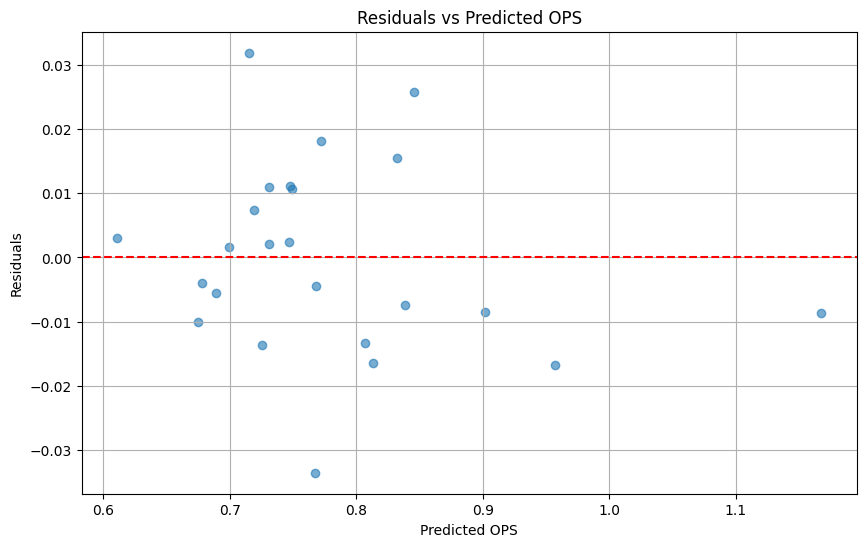

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted OPS')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted OPS')
plt.grid(True)
plt.show()

##Clustering

In [ ]:
features = ['HR', 'BB', 'SO', 'OPS', 'SLG', 'AVG']
X = batting_2024[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
batting_2024['Cluster'] = kmeans.fit_predict(X_scaled)

print(batting_2024['Cluster'].value_counts())

Cluster
1    44
0    34
3    27
2    12
Name: count, dtype: int64


###PCA Clustering

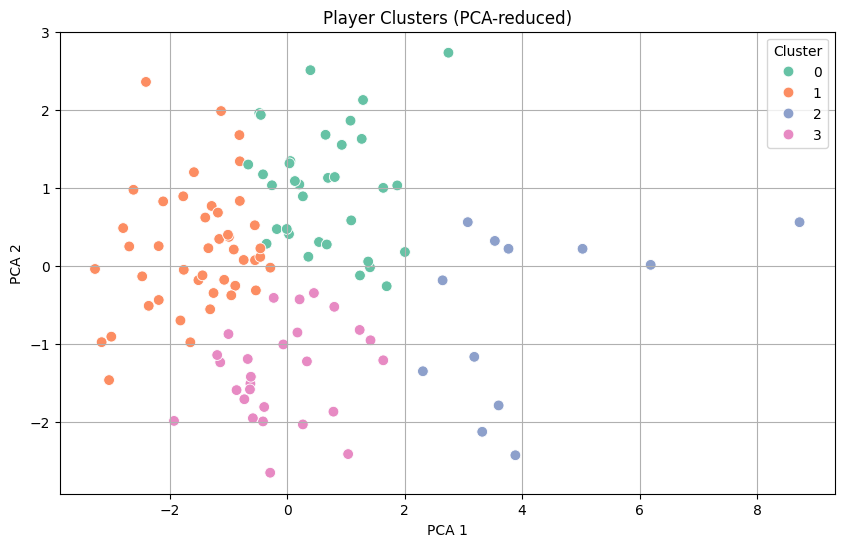

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

batting_2024['PCA1'] = X_pca[:, 0]
batting_2024['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=batting_2024, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Player Clusters (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

###Cluster Profiles

In [ ]:
cluster_profiles = batting_2024.groupby('Cluster')[features].mean()
print(cluster_profiles)

                HR         BB          SO       OPS       SLG       AVG
Cluster                                                                
0        26.764706  60.529412  160.147059  0.786647  0.457676  0.252206
1        15.727273  47.363636  123.704545  0.698000  0.387091  0.243000
2        39.166667  78.916667  131.750000  0.958917  0.572833  0.301250
3        19.333333  43.481481   96.592593  0.780222  0.445481  0.277407


In [ ]:
top_players_by_cluster = (
    batting_2024.sort_values(by=['Cluster', 'OPS'], ascending=False).groupby('Cluster').head(3)
)

print("Top 5 Players by OPS in Each Cluster:")
display(top_players_by_cluster[['Name', 'Team', 'Cluster', 'HR', 'OPS', 'SLG', 'AVG']])

Top 5 Players by OPS in Each Cluster:


,Name,Team,Cluster,HR,OPS,SLG,AVG
16,Corey Seager,TEX,3,30,0.864,0.512,0.278
11,Mookie Betts,LAD,3,19,0.863,0.491,0.289
13,Freddie Freeman,LAD,3,22,0.854,0.476,0.282
0,Aaron Judge,NYY,2,58,1.159,0.701,0.322
1,Shohei Ohtani,LAD,2,54,1.036,0.646,0.310
2,Juan Soto,NYY,2,41,0.989,0.569,0.288
44,Nathaniel Lowe,TEX,1,16,0.762,0.401,0.265
65,Will Smith,LAD,1,20,0.760,0.433,0.248
48,Jonathan India,CIN,1,15,0.750,0.392,0.248
18,Rafael Devers,BOS,0,28,0.871,0.516,0.272


In [ ]:
team_cluster_counts = batting_2024.groupby(['Cluster', 'Team']).size().reset_index(name='PlayerCount')

most_represented_teams = (
    team_cluster_counts.sort_values(['Cluster', 'PlayerCount'], ascending=[True, False])
    .groupby('Cluster')
    .first()
    .reset_index()
)

print("Teams with the most players in each cluster:")
print(most_represented_teams)

Teams with the most players in each cluster:
   Cluster Team  PlayerCount
0        0  ARI            3
1        1  TEX            6
2        2  NYY            2
3        3  STL            4


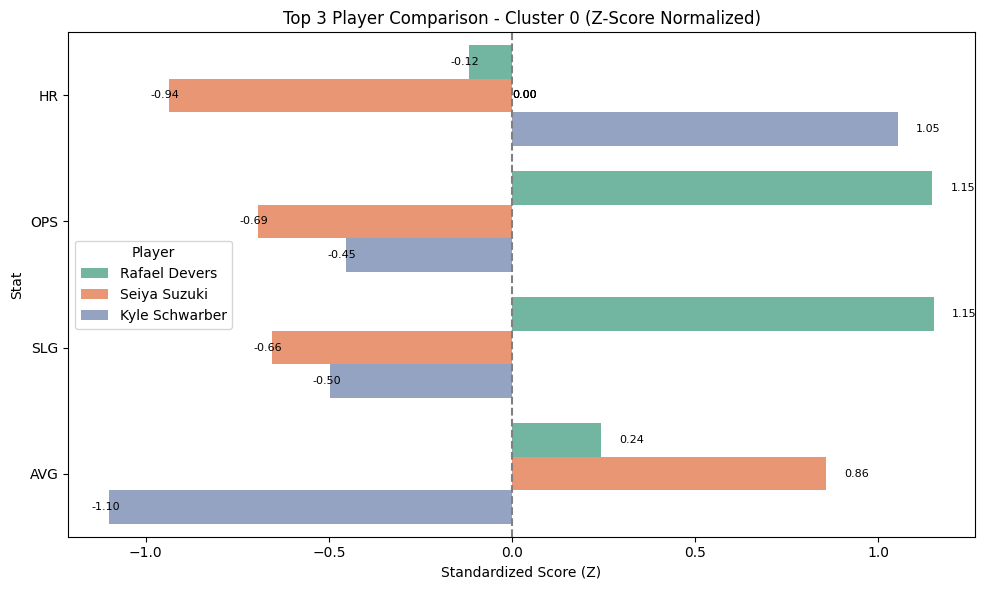

In [ ]:
# Top 3 players from Cluster 0
players = ['Rafael Devers', 'Kyle Schwarber', 'Seiya Suzuki']
stats = ['HR', 'OPS', 'SLG', 'AVG']

players_plot = batting_2024[batting_2024['Name'].isin(players)][['Name'] + stats].set_index('Name')

# Z-score normalization
players_standardized = (players_plot - players_plot.mean()) / players_plot.std()
players_standardized = players_standardized.reset_index()

players_melted = players_standardized.melt(id_vars = 'Name', var_name = 'Stat', value_name = 'ZScore')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data = players_melted, x = 'ZScore', y = 'Stat', hue = 'Name', palette = 'Set2')

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.05 * np.sign(width),
        p.get_y() + p.get_height() / 2,
        f'{width:.2f}',
        va = 'center',
        fontsize = 8
    )

plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 3 Player Comparison - Cluster 0 (Z-Score Normalized)')
plt.xlabel('Standardized Score (Z)')
plt.ylabel('Stat')
plt.legend(title='Player')
plt.tight_layout()
plt.show()

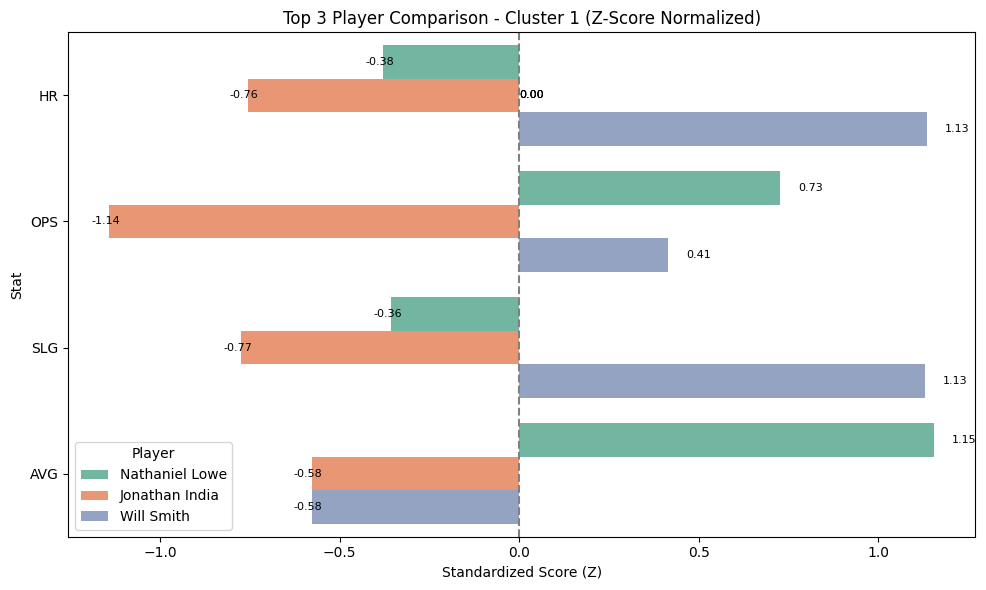

In [ ]:
# Top 3 Players Cluster 1
players = ['Nathaniel Lowe', 'Will Smith', 'Jonathan India']
stats = ['HR', 'OPS', 'SLG', 'AVG']

players_plot = batting_2024[batting_2024['Name'].isin(players)][['Name'] + stats].set_index('Name')

# Z-score normalization
players_standardized = (players_plot - players_plot.mean()) / players_plot.std()
players_standardized = players_standardized.reset_index()

players_melted = players_standardized.melt(id_vars = 'Name', var_name = 'Stat', value_name = 'ZScore')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data = players_melted, x = 'ZScore', y = 'Stat', hue = 'Name', palette = 'Set2')

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.05 * np.sign(width),
        p.get_y() + p.get_height() / 2,
        f'{width:.2f}',
        va = 'center',
        fontsize = 8
    )

plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 3 Player Comparison - Cluster 1 (Z-Score Normalized)')
plt.xlabel('Standardized Score (Z)')
plt.ylabel('Stat')
plt.legend(title='Player')
plt.tight_layout()
plt.show()

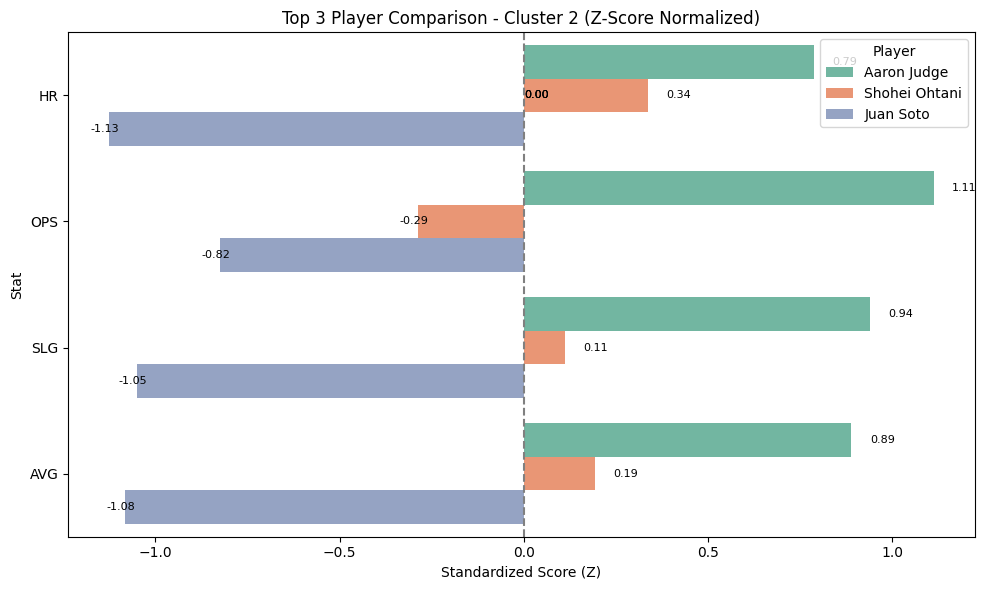

In [ ]:
# Top 3 Players from Cluster 3
players = ['Aaron Judge', 'Shohei Ohtani', 'Juan Soto']
stats = ['HR', 'OPS', 'SLG', 'AVG']

players_plot = batting_2024[batting_2024['Name'].isin(players)][['Name'] + stats].set_index('Name')

# Z-score normalization
players_standardized = (players_plot - players_plot.mean()) / players_plot.std()
players_standardized = players_standardized.reset_index()

players_melted = players_standardized.melt(id_vars = 'Name', var_name = 'Stat', value_name = 'ZScore')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data = players_melted, x = 'ZScore', y = 'Stat', hue = 'Name', palette = 'Set2')

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.05 * np.sign(width),
        p.get_y() + p.get_height() / 2,
        f'{width:.2f}',
        va = 'center',
        fontsize = 8
    )

plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 3 Player Comparison - Cluster 2 (Z-Score Normalized)')
plt.xlabel('Standardized Score (Z)')
plt.ylabel('Stat')
plt.legend(title='Player')
plt.tight_layout()
plt.show()

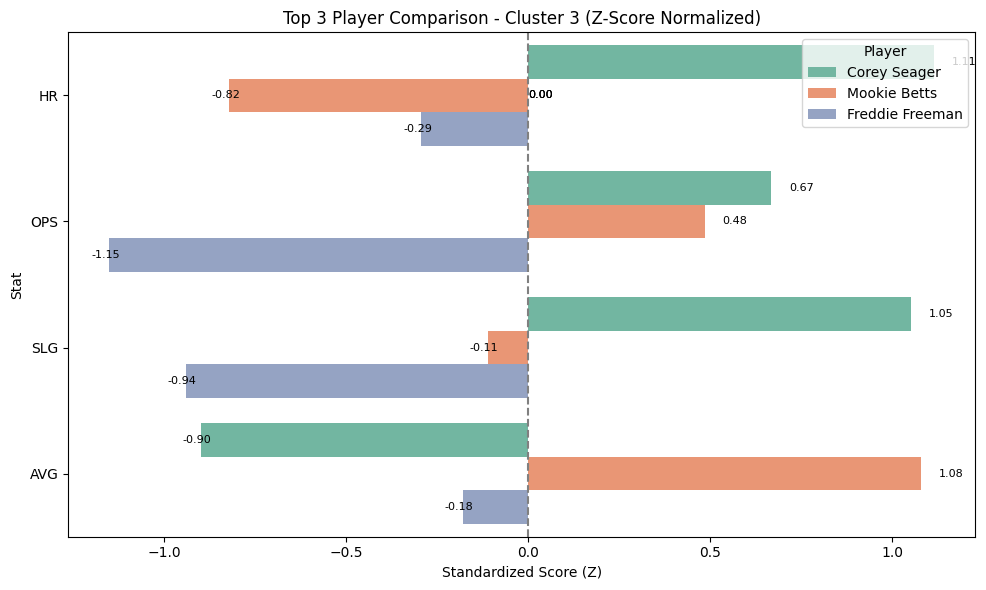

In [ ]:
# Top 3 Players Cluster 3
players = ['Corey Seager', 'Mookie Betts', 'Freddie Freeman']
stats = ['HR', 'OPS', 'SLG', 'AVG']

players_plot = batting_2024[batting_2024['Name'].isin(players)][['Name'] + stats].set_index('Name')

# Z-score normalization
players_standardized = (players_plot - players_plot.mean()) / players_plot.std()
players_standardized = players_standardized.reset_index()

players_melted = players_standardized.melt(id_vars = 'Name', var_name = 'Stat', value_name = 'ZScore')

plt.figure(figsize = (10, 6))
ax = sns.barplot(data = players_melted, x = 'ZScore', y = 'Stat', hue = 'Name', palette = 'Set2')

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.05 * np.sign(width),
        p.get_y() + p.get_height() / 2,
        f'{width:.2f}',
        va = 'center',
        fontsize = 8
    )

plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 3 Player Comparison - Cluster 3 (Z-Score Normalized)')
plt.xlabel('Standardized Score (Z)')
plt.ylabel('Stat')
plt.legend(title='Player')
plt.tight_layout()
plt.show()

##Summary of Findings - 2024 MLB Player Performance
###Data Cleaning and Feature Extraction
- Filtered players with > 100 at-bats to focus on active contributers
- Created meaningful features such as 'SO_rate', 'BB_rate', and 'Power Score'

###Visualizations
- HR and OPS distributions are heavily skewed, revealing a small group of elite power hitters
- Strong positive correlation found betwwen OPS, SLG, and HR, validating their use as predictive features
- Scatter plots and team bar charts illustrate:
  - HR and SLG is a strong linear trend
  - OPS tends to decrease with higher strikeout rates (SO_rate)
  - Some teams consistently maintain higher OPS values, indicating deeper offensive lineups

###Predictive Modeling
- Used Linear Regression to predict OPS from features: HR, BB, SO, H, AB
- This model achieved:
  - R^2 = 0.65: moderately strong explanatory power
  - RMSE = 0.06: relatively small prediction error
- Interpretation:
  - HR and BB were positively associated with OPS
  - SO had a clear negative effect

###Clustering Analysis
- Applied KMeans Clustering (k = 4) on key features (HB, BB, SO, SLG, OPS, AVG)
- Used PCA to reduce to 2D for visualization, revealing clear group separation
- Identified player archetypes:
  - Cluster 0: Power-Hybrid Hitters - Strong in SLG and OPS
  - Cluster 1: Mid-Tier/Untility Hitters - Mixed performance with some standout contributers
  - Cluster 2: Elite Sluggers - Top-tier power bats with high metrics, specifically OPS and SLG
  - Cluster 3: High-AVG Veterans - Consistent all-around hitters not considered elite in HR, but excelt in AVG and OBP-related metrics

###Z-Score Normalization Across Clusters
To better understand performance differences with each clusters, the top 3 players by OPS in each group were compared using Z-score normalization across 4 key features: HR, OPS, SLG, and AVG. This allowed a fair comparison regardless of differing stat scales
- Cluster 0 - Power-Hybrid Hitters:
  - Rafael Devers dominated this group, leading in all 4 stats, especially OPS and SLG
  - Seiya Suzuki showed strength in AVG, indicating high contact quality, but lagged in HR
  - Kyle Schwarber underperformed in this cluster relative to Devers and Suzuki, especially in AVG
- Cluster 1 - Mid-Tier/Utility Hitters:
  - Will Smith led this group in HR, SLG, and OPS, despite a below-average AVG
  - Nathaniel Lowe was consistently above average in OPS and AVG, suggesting value through consistency rather than power
  - Jonathan India underperformed across all 4 stats, particularly in OPS
- Cluster 2: Elite Sluggers:
  - Aaron Judge was dominant, leading this group across all metrics with OPS and SLG both > +0.9 Z
  - Shohei Ohtani has a solid, balanced showing with all Z-scores close to average
  - Juan Soto was noteably below average relative to this cluster, especially in HR and SLG
- Cluster 3 - High-AVG Veterans:
  - Corey Seager showed strength across the board, especially in HR and SLG
  - Mookie Betts led in AVG, highlighting his value as a high-contact, all-around hitter
  - Freddie Freeman surprisingly lagged in this group, with negative Z-scores across all stats

###Final Takeaways
- Power and efficiency can be quantified and clustered using a mix of traditional and engineered statistics
- OPS is a valuable performance summary, but decomposition reveals deeper context
- Combining EDA, regression, and clustering offers a robust analytical toolkit for player evaluation, roster planning, or scouting